In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [4]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [5]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

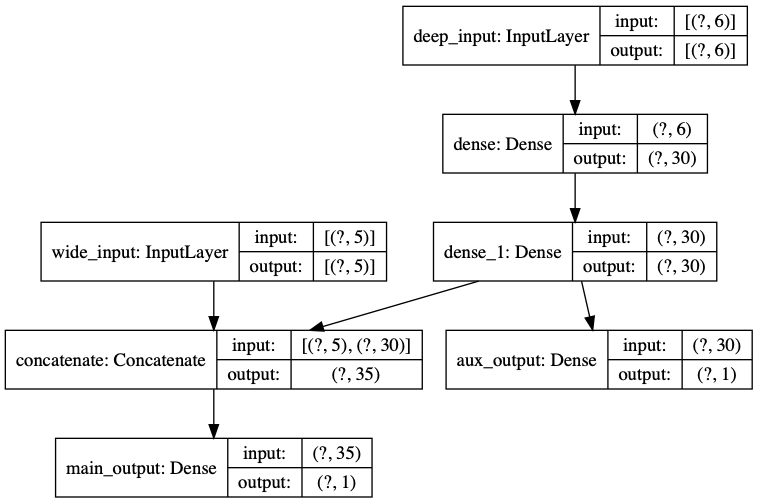

In [7]:
keras.utils.plot_model(model, "diagrams/04_test.png", show_shapes=True)

In [8]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [9]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 68us/sample - loss: 2.3571 - main_output_loss: 2.1125 - aux_output_loss: 4.5535 - val_loss: 1.2167 - val_main_output_loss: 0.9499 - val_aux_output_loss: 3.6180
Epoch 2/20
11610/11610 [==============================] - 0s 39us/sample - loss: 1.0728 - main_output_loss: 0.8665 - aux_output_loss: 2.9284 - val_loss: 0.8936 - val_main_output_loss: 0.7305 - val_aux_output_loss: 2.3621
Epoch 3/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.8288 - main_output_loss: 0.6940 - aux_output_loss: 2.0398 - val_loss: 0.7835 - val_main_output_loss: 0.6712 - val_aux_output_loss: 1.7947
Epoch 4/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.7443 - main_output_loss: 0.6449 - aux_output_loss: 1.6383 - val_loss: 0.7230 - val_main_output_loss: 0.6320 - val_aux_output_loss: 1.5420
Epoch 5/20
11610/11610 [==============================] - 0s 38us/s

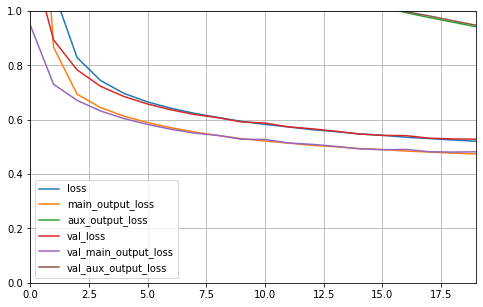

In [10]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
total_loss, main_loss, aux_loss = model.evaluate(
                                [X_test_A, X_test_B], 
                                [y_test, y_test])

5160/5160 [==============================] - 0s 18us/sample - loss: 0.5111 - main_output_loss: 0.4621 - aux_output_loss: 0.9373


In [12]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [13]:
y_pred_main

array([[1.9098268],
       [1.7140362],
       [2.8367093]], dtype=float32)

In [14]:
y_pred_aux

array([[2.0858064],
       [2.1297026],
       [2.3523285]], dtype=float32)